<a href="https://colab.research.google.com/github/AhmedElgamiel/MnistClassifier/blob/main/MnistClassificationForTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data loading , visualization and pre-processing


## Some installations

In [1]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
import os
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.utils import to_categorical



##Load Data 

In [3]:
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train  = np.expand_dims(X_train,-1)
X_test  = np.expand_dims(X_test,-1)
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)


## Pixels normalization

In [5]:
# scale pixels
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm

In [6]:
X_train , X_test = prep_pixels(X_train , X_test)

## Split training data into training and validation sets

In [7]:
X_train, X_val , y_train , y_val = train_test_split(X_train,y_train , test_size = 0.2 , random_state = 19)


# Define our models and training them

## Function to plot performance

In [8]:
def plot_performance (history) :
  # plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

## Image generator

In [9]:
traingen = ImageDataGenerator(rotation_range=8, width_shift_range=0.2,
                               height_shift_range=0.2, zoom_range=0.2)

valgen = ImageDataGenerator()


In [10]:
train_iterator = traingen.flow(X_train, y_train, batch_size=64)
val_iterator = valgen.flow(X_val, y_val, batch_size=64)


## Build the first model

In [10]:
model_1 = keras.models.Sequential([
                         keras.layers.Conv2D(filters = 32 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 1st Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                       
                         keras.layers.Flatten(),
                         keras.layers.BatchNormalization(),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                        

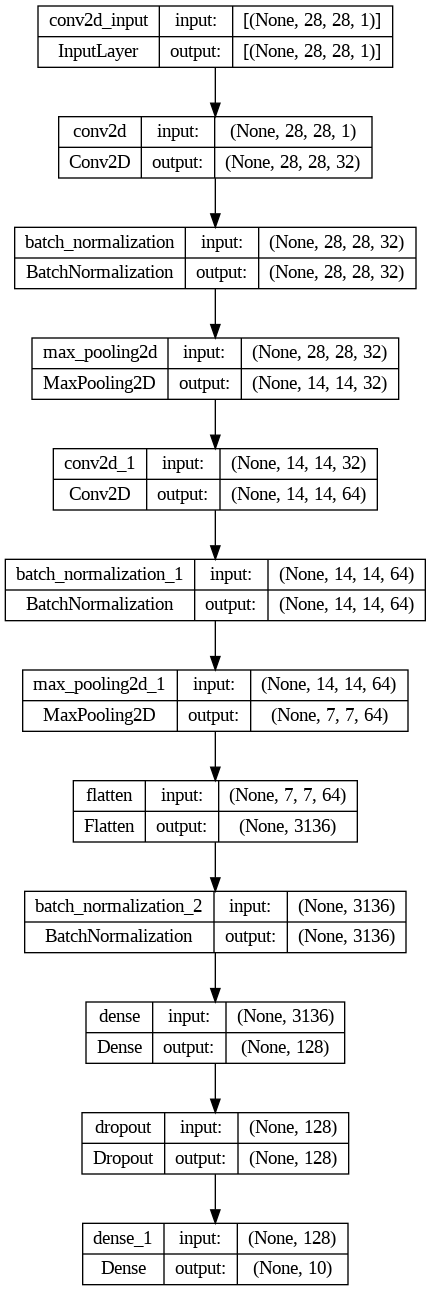

In [12]:
keras.utils.plot_model(model_1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
model_1.compile(optimizer=keras.optimizers.Adam(lr=0.01) , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
history_1 = model_1.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,
                                 epochs=20,
                                 validation_data=val_iterator, 
                                 validation_steps=X_val.shape[0]//64,
                                 use_multiprocessing=True)


Epoch 1/20


<ipython-input-14-f7ac4e41060b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_1 = model_1.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,


750/750 [==============================] - 21s 22ms/step - loss: 1.0220 - accuracy: 0.6861 - val_loss: 0.6700 - val_accuracy: 0.7472
Epoch 2/20
750/750 [==============================] - 16s 21ms/step - loss: 0.7397 - accuracy: 0.7285 - val_loss: 0.9670 - val_accuracy: 0.7147
Epoch 3/20
750/750 [==============================] - 17s 23ms/step - loss: 0.7095 - accuracy: 0.7402 - val_loss: 2.0421 - val_accuracy: 0.6144
Epoch 4/20
750/750 [==============================] - 17s 23ms/step - loss: 0.6800 - accuracy: 0.7529 - val_loss: 1.3725 - val_accuracy: 0.6938
Epoch 5/20
750/750 [==============================] - 17s 22ms/step - loss: 0.6694 - accuracy: 0.7570 - val_loss: 2.9686 - val_accuracy: 0.6568
Epoch 6/20
750/750 [==============================] - 17s 23ms/step - loss: 0.6504 - accuracy: 0.7652 - val_loss: 1.0438 - val_accuracy: 0.6929
Epoch 7/20
750/750 [==============================] - 17s 22ms/step - loss: 0.6429 - accuracy: 0.7691 - val_loss: 0.8456 - val_accuracy: 0.6995
Epo

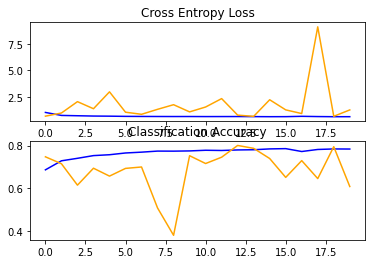

In [15]:
plot_performance(history_1)

## Model Evaluation

In [16]:
# evaluate model
_, acc = model_1.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 1.4056 - accuracy: 0.6018
> 60.180


In [23]:
history_1_without_aug = model_1.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3081 - accuracy: 0.8861 - val_loss: 0.3013 - val_accuracy: 0.8882
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2753 - accuracy: 0.8979 - val_loss: 0.3128 - val_accuracy: 0.8828
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2617 - accuracy: 0.9019 - val_loss: 0.2863 - val_accuracy: 0.8955
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2497 - accuracy: 0.9059 - val_loss: 0.2819 - val_accuracy: 0.8965
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2481 - accuracy: 0.9079 - val_loss: 0.2715 - val_accuracy: 0.8991
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2370 - accuracy: 0.9116 - val_loss: 0.2952 - val_accuracy: 0.8979
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2329 - accuracy: 0.9132 - val_loss: 0.2946 - val_accuracy: 0.8954
Epoch 

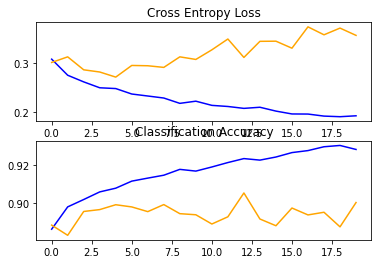

In [24]:
plot_performance(history_1_without_aug)

## Model Evaluation

In [27]:
# evaluate model
_, acc = model_1.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.3807 - accuracy: 0.8949
> 89.490


## Build the second model : add another CNN layer

In [17]:
model_2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters = 32 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 1st Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                       
                         keras.layers.Flatten(),
                      
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.BatchNormalization(),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

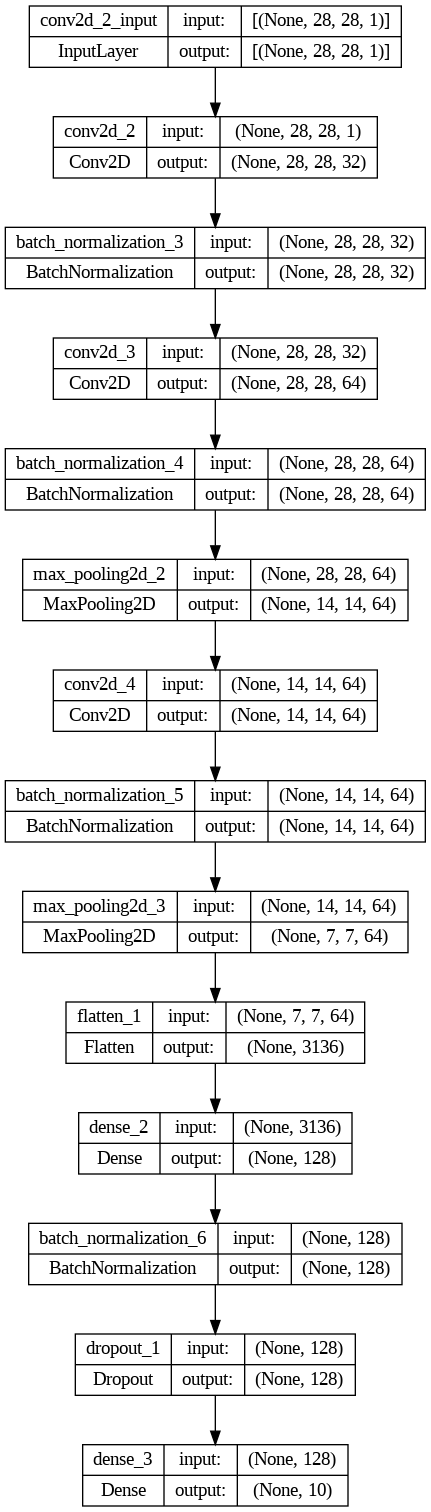

In [18]:
keras.utils.plot_model(model_2, to_file='model_2_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
model_2.compile(optimizer=keras.optimizers.Adam(lr=0.01) , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [20]:
history_2 = model_2.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,
                                 epochs=30,
                                 validation_data=val_iterator, 
                                 validation_steps=X_val.shape[0]//64,
                                 use_multiprocessing=True)


Epoch 1/30


<ipython-input-20-6c828b07e8f0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2 = model_2.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,


750/750 [==============================] - 19s 24ms/step - loss: 0.6814 - accuracy: 0.7468 - val_loss: 0.5404 - val_accuracy: 0.8105
Epoch 2/30
750/750 [==============================] - 17s 23ms/step - loss: 0.5013 - accuracy: 0.8138 - val_loss: 0.4376 - val_accuracy: 0.8337
Epoch 3/30
750/750 [==============================] - 18s 23ms/step - loss: 0.4468 - accuracy: 0.8355 - val_loss: 0.4615 - val_accuracy: 0.8260
Epoch 4/30
750/750 [==============================] - 19s 26ms/step - loss: 0.4153 - accuracy: 0.8462 - val_loss: 0.3753 - val_accuracy: 0.8702
Epoch 5/30
750/750 [==============================] - 18s 23ms/step - loss: 0.3983 - accuracy: 0.8531 - val_loss: 0.3039 - val_accuracy: 0.8884
Epoch 6/30
750/750 [==============================] - 18s 23ms/step - loss: 0.3841 - accuracy: 0.8591 - val_loss: 0.3294 - val_accuracy: 0.8822
Epoch 7/30
750/750 [==============================] - 18s 24ms/step - loss: 0.3763 - accuracy: 0.8619 - val_loss: 0.4178 - val_accuracy: 0.8500
Epo

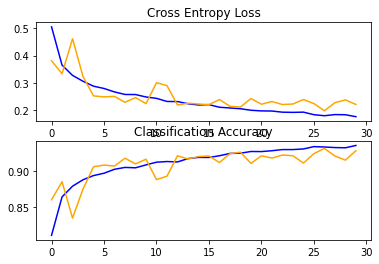

In [21]:
plot_performance(history_2)

## Model Evaluation

In [21]:
# evaluate model
_, acc = model_2.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.3679 - accuracy: 0.8770
> 87.700


In [31]:
history_2_without_aug = model_2.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
375/375 [==============================] - 5s 13ms/step - loss: 0.5104 - accuracy: 0.8327 - val_loss: 0.3219 - val_accuracy: 0.8798
Epoch 2/20
375/375 [==============================] - 5s 14ms/step - loss: 0.2992 - accuracy: 0.8900 - val_loss: 0.2970 - val_accuracy: 0.8890
Epoch 3/20
375/375 [==============================] - 4s 11ms/step - loss: 0.2675 - accuracy: 0.9010 - val_loss: 0.2944 - val_accuracy: 0.8907
Epoch 4/20
375/375 [==============================] - 4s 11ms/step - loss: 0.2522 - accuracy: 0.9063 - val_loss: 0.2835 - val_accuracy: 0.8983
Epoch 5/20
375/375 [==============================] - 4s 11ms/step - loss: 0.2350 - accuracy: 0.9134 - val_loss: 0.2872 - val_accuracy: 0.8966
Epoch 6/20
375/375 [==============================] - 4s 11ms/step - loss: 0.2209 - accuracy: 0.9170 - val_loss: 0.2613 - val_accuracy: 0.9097
Epoch 7/20
375/375 [==============================] - 4s 11ms/step - loss: 0.2228 - accuracy: 0.9177 - val_loss: 0.2760 - val_accuracy: 0.9058

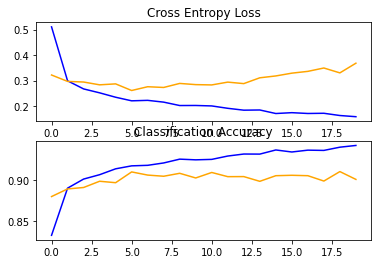

In [34]:
plot_performance(history_2_without_aug)

## Model Evaluation

In [35]:
# evaluate model
_, acc = model_2.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 2s 6ms/step - loss: 0.3914 - accuracy: 0.8971
> 89.710


## Build the third model : add another CNN 

In [11]:
model_3 = keras.models.Sequential([
    
                         keras.layers.Conv2D(filters = 32 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 1st Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.Conv2D(filters = 128 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                       
                         keras.layers.Flatten(),

                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.BatchNormalization(),
                         keras.layers.Dropout(0.20),
                         
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

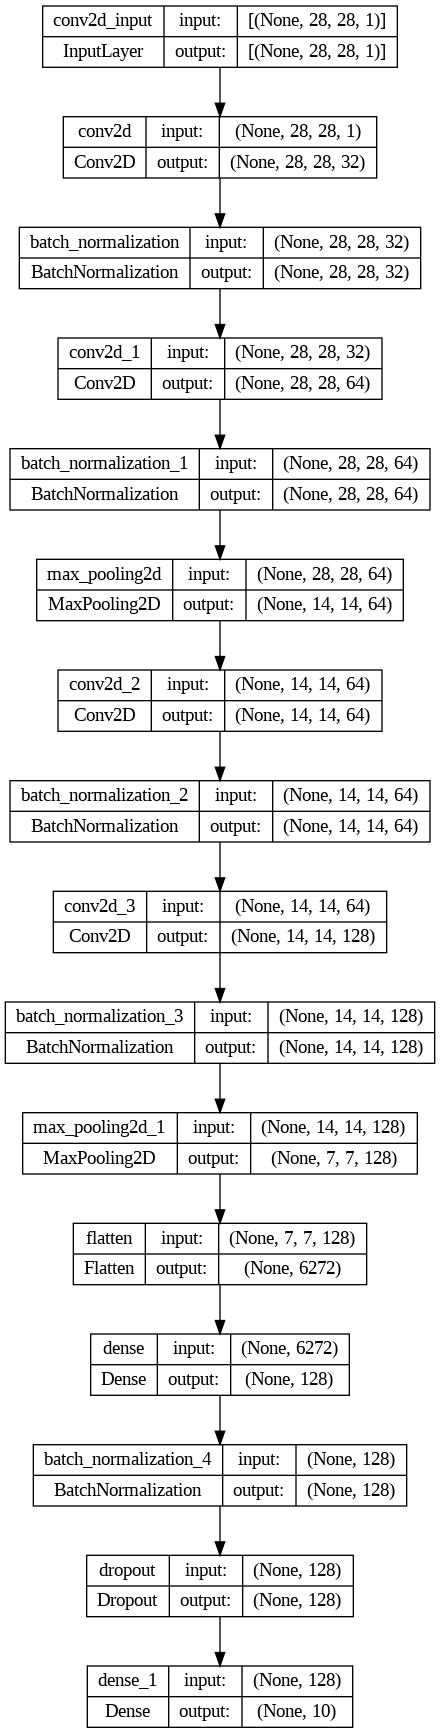

In [12]:
keras.utils.plot_model(model_3, to_file='model_3_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                        

In [43]:
model_3.compile(optimizer=keras.optimizers.Adam(lr=0.01) , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [44]:
# As the model complexity increases I will increase the number of epochs to 40
history_3 = model_3.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,
                                 epochs=30,
                                 validation_data=val_iterator, 
                                 validation_steps=X_val.shape[0]//64,
                                 use_multiprocessing=True)


Epoch 1/30


<ipython-input-44-0186f228c8be>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_3 = model_3.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,


750/750 [==============================] - 19s 24ms/step - loss: 0.7285 - accuracy: 0.7292 - val_loss: 0.7737 - val_accuracy: 0.7570
Epoch 2/30
750/750 [==============================] - 18s 24ms/step - loss: 0.5328 - accuracy: 0.8030 - val_loss: 0.4548 - val_accuracy: 0.8300
Epoch 3/30
750/750 [==============================] - 18s 23ms/step - loss: 0.4543 - accuracy: 0.8319 - val_loss: 0.3348 - val_accuracy: 0.8774
Epoch 4/30
750/750 [==============================] - 18s 23ms/step - loss: 0.4194 - accuracy: 0.8481 - val_loss: 0.3422 - val_accuracy: 0.8768
Epoch 5/30
750/750 [==============================] - 18s 24ms/step - loss: 0.4032 - accuracy: 0.8531 - val_loss: 0.5134 - val_accuracy: 0.8135
Epoch 6/30
750/750 [==============================] - 18s 24ms/step - loss: 0.3748 - accuracy: 0.8644 - val_loss: 0.3495 - val_accuracy: 0.8722
Epoch 7/30
750/750 [==============================] - 18s 24ms/step - loss: 0.3676 - accuracy: 0.8671 - val_loss: 0.3826 - val_accuracy: 0.8677
Epo

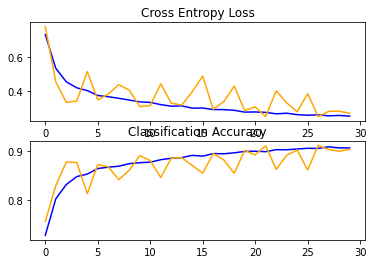

In [45]:
plot_performance(history_3)

### Model evaluation

In [46]:
# evaluate model
_, acc = model_3.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 2s 6ms/step - loss: 0.2957 - accuracy: 0.8958
> 89.580


## Train model_3 without data augmentation

In [50]:
history_3_without_aug = model_3.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_val, y_val), verbose=1)

Epoch 1/25
375/375 [==============================] - 6s 15ms/step - loss: 0.6506 - accuracy: 0.8101 - val_loss: 0.3558 - val_accuracy: 0.8705
Epoch 2/25
375/375 [==============================] - 5s 14ms/step - loss: 0.3397 - accuracy: 0.8759 - val_loss: 0.2957 - val_accuracy: 0.8852
Epoch 3/25
375/375 [==============================] - 5s 14ms/step - loss: 0.3102 - accuracy: 0.8848 - val_loss: 0.2889 - val_accuracy: 0.8926
Epoch 4/25
375/375 [==============================] - 5s 14ms/step - loss: 0.2968 - accuracy: 0.8909 - val_loss: 0.2862 - val_accuracy: 0.8952
Epoch 5/25
375/375 [==============================] - 5s 14ms/step - loss: 0.2865 - accuracy: 0.8948 - val_loss: 0.2932 - val_accuracy: 0.8878
Epoch 6/25
375/375 [==============================] - 5s 15ms/step - loss: 0.2838 - accuracy: 0.8942 - val_loss: 0.2949 - val_accuracy: 0.8930
Epoch 7/25
375/375 [==============================] - 5s 14ms/step - loss: 0.2764 - accuracy: 0.8989 - val_loss: 0.2978 - val_accuracy: 0.8867

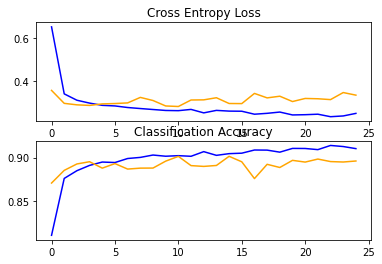

In [53]:
plot_performance(history_3_without_aug)

## Model Evaluation

In [54]:
# evaluate model
_, acc = model_3.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.3543 - accuracy: 0.8954
> 89.540


## Build the fifth model 

In [47]:
model_5 = keras.models.Sequential([
    
                         keras.layers.Conv2D(filters = 32 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 1st Layer
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 32 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                       
                         keras.layers.Flatten(),
                         

                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.20),
                         
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

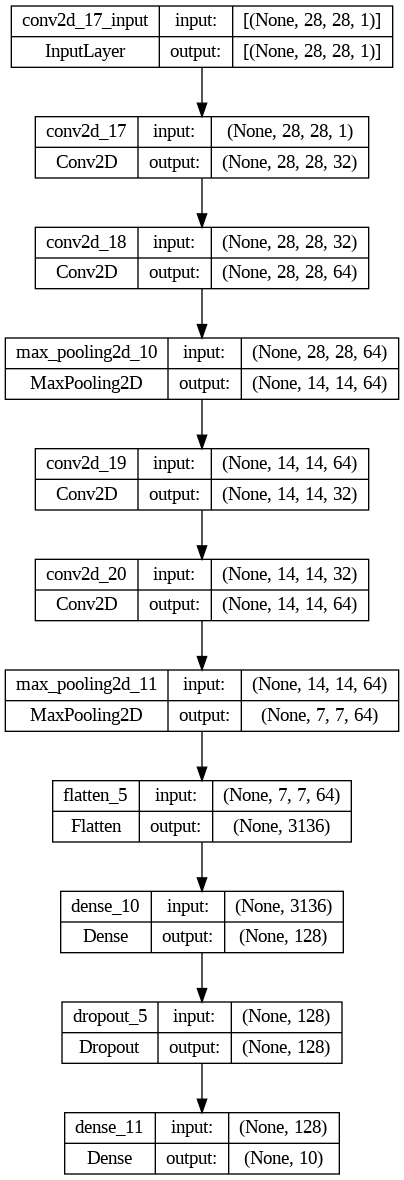

In [48]:
keras.utils.plot_model(model_5, to_file='model_5_plot.png', show_shapes=True, show_layer_names=True)

In [49]:
model_5.compile(optimizer=keras.optimizers.Adam(lr=0.01) , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [50]:
history_5 = model_5.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,
                                 epochs=30,
                                 validation_data=val_iterator, 
                                 validation_steps=X_val.shape[0]//64,
                                 use_multiprocessing=True)


Epoch 1/30


<ipython-input-50-9e11970ae588>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_5 = model_5.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,


750/750 [==============================] - 17s 22ms/step - loss: 0.8894 - accuracy: 0.6690 - val_loss: 0.5773 - val_accuracy: 0.7777
Epoch 2/30
750/750 [==============================] - 17s 22ms/step - loss: 0.6728 - accuracy: 0.7441 - val_loss: 0.5509 - val_accuracy: 0.7846
Epoch 3/30
750/750 [==============================] - 17s 23ms/step - loss: 0.6517 - accuracy: 0.7521 - val_loss: 0.5287 - val_accuracy: 0.7969
Epoch 4/30
750/750 [==============================] - 19s 25ms/step - loss: 0.6412 - accuracy: 0.7554 - val_loss: 0.5284 - val_accuracy: 0.7982
Epoch 5/30
750/750 [==============================] - 17s 22ms/step - loss: 0.6229 - accuracy: 0.7645 - val_loss: 0.4858 - val_accuracy: 0.8197
Epoch 6/30
750/750 [==============================] - 17s 22ms/step - loss: 0.6262 - accuracy: 0.7646 - val_loss: 0.5075 - val_accuracy: 0.8092
Epoch 7/30
750/750 [==============================] - 17s 22ms/step - loss: 0.6274 - accuracy: 0.7621 - val_loss: 0.5283 - val_accuracy: 0.8069
Epo

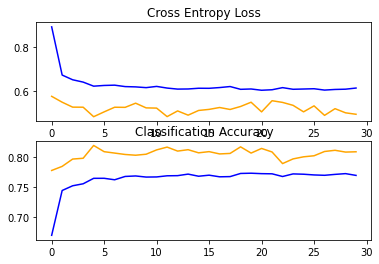

In [51]:
plot_performance(history_5)

## Model Evaluation

In [52]:
# evaluate model
_, acc = model_5.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.4912 - accuracy: 0.8096
> 80.960


## Model_5 traing withoutr data augmentation

In [73]:
history_5_without_aug = model_5.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_val, y_val), verbose=1)

Epoch 1/25
375/375 [==============================] - 7s 16ms/step - loss: 0.5404 - accuracy: 0.8139 - val_loss: 0.3518 - val_accuracy: 0.8639
Epoch 2/25
375/375 [==============================] - 5s 13ms/step - loss: 0.3368 - accuracy: 0.8753 - val_loss: 0.3224 - val_accuracy: 0.8738
Epoch 3/25
375/375 [==============================] - 4s 12ms/step - loss: 0.3050 - accuracy: 0.8862 - val_loss: 0.2958 - val_accuracy: 0.8869
Epoch 4/25
375/375 [==============================] - 4s 12ms/step - loss: 0.2966 - accuracy: 0.8896 - val_loss: 0.2903 - val_accuracy: 0.8912
Epoch 5/25
375/375 [==============================] - 5s 12ms/step - loss: 0.2860 - accuracy: 0.8930 - val_loss: 0.3182 - val_accuracy: 0.8748
Epoch 6/25
375/375 [==============================] - 5s 12ms/step - loss: 0.2755 - accuracy: 0.8967 - val_loss: 0.2722 - val_accuracy: 0.8961
Epoch 7/25
375/375 [==============================] - 5s 12ms/step - loss: 0.2706 - accuracy: 0.8981 - val_loss: 0.2762 - val_accuracy: 0.8977

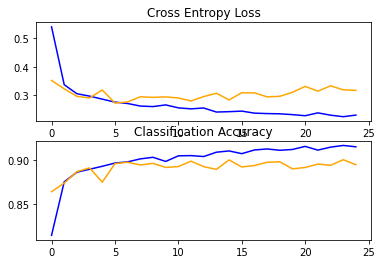

In [74]:
plot_performance(history_5_without_aug)

## Model Evaluation

In [75]:
# evaluate model
_, acc = model_5.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.3420 - accuracy: 0.8949
> 89.490


# Final model select 

Model 3 which is trained on augmented data will be selected as it has the best performance more reciptive field than model 3

In [14]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                        

## Reciptive field calculation

After research for the mathemtical forms to calculate the reciptive for per each layer , I reached to these formulas : 
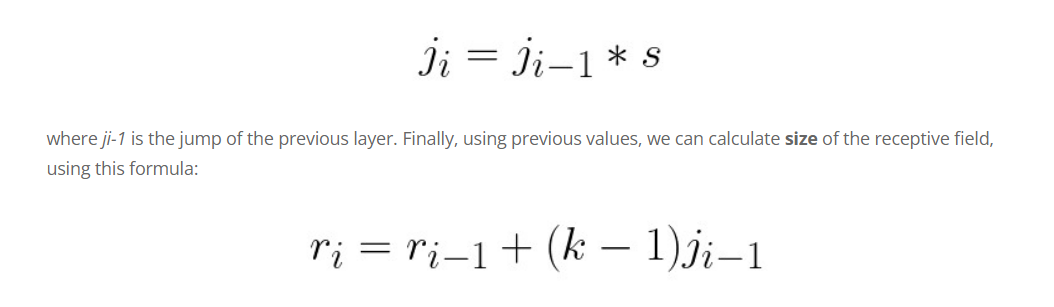

source : https://rubikscode.net/2021/11/15/receptive-field-arithmetic-for-convolutional-neural-networks/

And after some research I found the code for implementing the receptive field per each layer , I tested it manually with paper and pencil and it gave me the same result

## Code to automate reciptive field calculation

In [53]:
# [kernel_size , stride , padding]
convnet =[[3,1,1],[3,1,1],[2,2,0],[3,1,1],[3,1,1],[2,2,0]]
layer_name = ['conv1','conv2','pool1','conv3','conv4','pool2']
imsize = 28


def outFromIn(isz, layernum = 9, net = convnet):
    if layernum>len(net): layernum=len(net)

    totstride = 1
    insize = isz
    #for layerparams in net:
    for layer in range(layernum):
        fsize, stride, pad = net[layer]
        outsize = (insize - fsize + 2*pad) / stride + 1
        insize = outsize
        totstride = totstride * stride
    return outsize, totstride

def inFromOut( layernum = 9, net = convnet):
    if layernum>len(net): layernum=len(net)
    outsize = 1
    #for layerparams in net:
    for layer in reversed(range(layernum)):
        fsize, stride, pad = net[layer]
        outsize = ((outsize -1)* stride) + fsize
    RFsize = outsize
    return RFsize


print( "layer output sizes given image = %dx%d" % (imsize, imsize))
for i in range(len(convnet)):
    p = outFromIn(imsize,i+1)
    rf = inFromOut(i+1)
    print ("Layer Name = %s, Output size = %3d, Stride = % 3d, RF size = %3d" % (layer_name[i], p[0], p[1], rf))


layer output sizes given image = 28x28
Layer Name = conv1, Output size =  28, Stride =   1, RF size =   3
Layer Name = conv2, Output size =  28, Stride =   1, RF size =   5
Layer Name = pool1, Output size =  14, Stride =   2, RF size =   6
Layer Name = conv3, Output size =  14, Stride =   2, RF size =  10
Layer Name = conv4, Output size =  14, Stride =   2, RF size =  14
Layer Name = pool2, Output size =   7, Stride =   4, RF size =  16


## Calculating FLOPs and MACCs for each layer

## Let's start with MACCs

MACC formula for CNN : K × K × Cin × Hout × Wout × Cout 

MACC formula for dense : (n_inp + 1) * n_out

We have 4 conv layers and 2 Dense layers : 

1.   MACC_conv1 = 3 * 3 * 1 * 28 * 28 *32 = 225792
2.   MACC_conv2 = 3 * 3 *32 * 28 * 28 * 64 = 14.45 * 10^6
3.   MACC_conv3 = 3 * 3 * 64 * 14 * 14 * 64 = 7.225 * 10^6
4.   MACC_conv4 = 3 * 3 * 64 * 14 * 14 * 128 = 14.45 * 10^6
***After the flattening layer , we have 3136 input for the first dense layer***
5.   MACC_dense1 = (6272+1) * 128 = 802944
6.   MACC_dense2 = (128+1) * 10 = 1290




## Let's calculate FLOPs

Formula of FLOPs for cnn is [(Kh​∗Kw​∗Cin​)∗Cout​+Cout​]∗[Hout​∗Wout​]

Formula of FLOPs for dense is N_in * N_out + N_out

We have 4 conv layers and 2 Dense layers : 

1.   FLOPs_conv1 = [(3 * 3 * 1 ) * 32 + 32 ] * [28 * 28] = 250880
2.   FLOPs_conv2 = [(3 * 3 * 32) * 64 + 64] * [28 * 28] = 14.5 * 10^6
3.   FLOPs_conv3 = [(3 * 3 * 64) * 64 + 64] * [14 * 14] = 7.42 * 10^6
4.   FLOPs_conv4 = [(3 * 3 * 64) * 128 + 128] * [14 * 14] = 14.476 * 10^6
***After the flattening layer , we have 3136 input for the first dense layer***
5.   FLOPs_dense1 = (6272+1) * 128 = 802944
6.   FLOPs_dense2 = (128+1) * 10 = 1290


# IMPORTANT : Till here there is nothing important I want to show , but I left it to not neglect the effort I made in the task

In [108]:
model_2_with_batch_norm.compile(optimizer=keras.optimizers.Adam(lr=0.01) , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [109]:
history_2_with_batchnorm = model_2_with_batch_norm.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,
                                                                  epochs=40,
                                                                  validation_data=val_iterator, 
                                                                  validation_steps=X_val.shape[0]//64,
                                                                  use_multiprocessing=True)


Epoch 1/40


<ipython-input-109-87a31dd99eb5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2_with_batchnorm = model_2_with_batch_norm.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,


750/750 [==============================] - 19s 24ms/step - loss: 1.0897 - accuracy: 0.6172 - val_loss: 0.6029 - val_accuracy: 0.7696
Epoch 2/40
750/750 [==============================] - 18s 24ms/step - loss: 0.7165 - accuracy: 0.7325 - val_loss: 0.6629 - val_accuracy: 0.7440
Epoch 3/40
750/750 [==============================] - 18s 24ms/step - loss: 0.6379 - accuracy: 0.7661 - val_loss: 0.5429 - val_accuracy: 0.7923
Epoch 4/40
750/750 [==============================] - 18s 24ms/step - loss: 0.5978 - accuracy: 0.7846 - val_loss: 0.4589 - val_accuracy: 0.8333
Epoch 5/40
750/750 [==============================] - 19s 25ms/step - loss: 0.5693 - accuracy: 0.7942 - val_loss: 0.4921 - val_accuracy: 0.8265
Epoch 6/40
750/750 [==============================] - 19s 25ms/step - loss: 0.5647 - accuracy: 0.7974 - val_loss: 0.4560 - val_accuracy: 0.8295
Epoch 7/40
750/750 [==============================] - 19s 25ms/step - loss: 0.5483 - accuracy: 0.8030 - val_loss: 0.4515 - val_accuracy: 0.8314
Epo

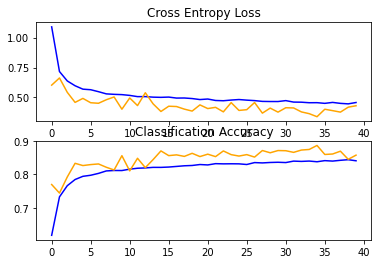

In [110]:
plot_performance(history_2_with_batchnorm)

## Model Evaluation

In [113]:
# evaluate model
_, acc = model_2_with_batch_norm.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.4445 - accuracy: 0.8579
> 85.790


## Build model_3 with BatchNorm , train it on augmented data with 50 epochs

In [27]:
traingen = ImageDataGenerator(rotation_range=10, # rotation
                              width_shift_range=0.2, # horizontal shift
                              height_shift_range=0.2, # vertical shift
                              zoom_range=0.2, # zoom
                              horizontal_flip=True) # horizontal flip

valgen = ImageDataGenerator()

In [28]:
train_iterator = traingen.flow(X_train, y_train, batch_size=64)
val_iterator = valgen.flow(X_val, y_val, batch_size=64)


In [29]:
model_3_with_batch_norm = keras.models.Sequential([
    
                         keras.layers.Conv2D(filters = 32 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 1st Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.Conv2D(filters = 128 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                       
                         keras.layers.Flatten(),

                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.20),
                         
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

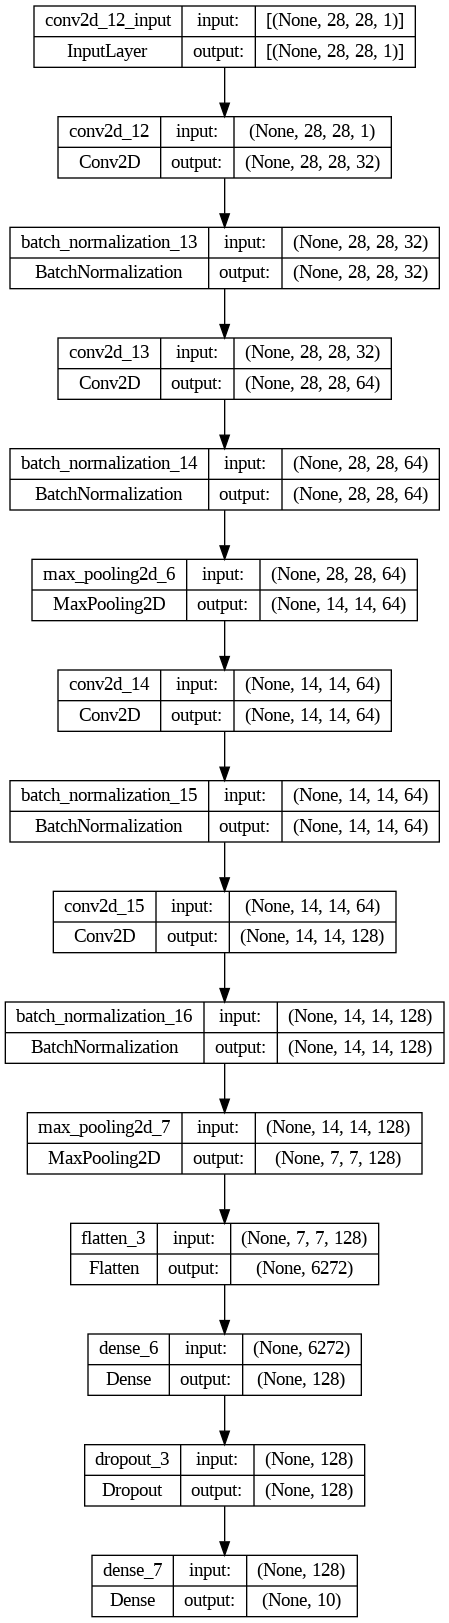

In [30]:
keras.utils.plot_model(model_3_with_batch_norm, to_file='model_3_with_batch_norm.png', show_shapes=True, show_layer_names=True)

In [31]:
model_3_with_batch_norm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_13 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_14 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                      

In [32]:
model_3_with_batch_norm.compile(optimizer=keras.optimizers.Adam(lr=0.01) , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
# As the model complexity increases I will increase the number of epochs to 40
history_3_with_batch_norm = model_3_with_batch_norm.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,
                                 epochs=,
                                 validation_data=val_iterator, 
                                 validation_steps=X_val.shape[0]//64,
                                 use_multiprocessing=True)


Epoch 1/50


<ipython-input-33-0840fb5ecf73>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_3_with_batch_norm = model_3_with_batch_norm.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,


750/750 [==============================] - 23s 30ms/step - loss: 1.4987 - accuracy: 0.4846 - val_loss: 0.9469 - val_accuracy: 0.6754
Epoch 2/50
750/750 [==============================] - 19s 25ms/step - loss: 0.9484 - accuracy: 0.6298 - val_loss: 0.6618 - val_accuracy: 0.7294
Epoch 3/50
750/750 [==============================] - 19s 25ms/step - loss: 0.8362 - accuracy: 0.6719 - val_loss: 0.6649 - val_accuracy: 0.7418
Epoch 4/50
750/750 [==============================] - 21s 27ms/step - loss: 0.7661 - accuracy: 0.7042 - val_loss: 0.5872 - val_accuracy: 0.7926
Epoch 5/50
750/750 [==============================] - 19s 26ms/step - loss: 0.7250 - accuracy: 0.7273 - val_loss: 0.5005 - val_accuracy: 0.8270
Epoch 6/50
750/750 [==============================] - 19s 25ms/step - loss: 0.6902 - accuracy: 0.7442 - val_loss: 0.5117 - val_accuracy: 0.8023
Epoch 7/50
750/750 [==============================] - 19s 26ms/step - loss: 0.6564 - accuracy: 0.7627 - val_loss: 0.4532 - val_accuracy: 0.8321
Epo

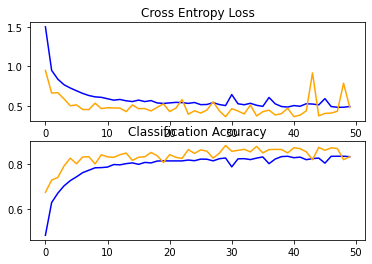

In [34]:
plot_performance(history_3_with_batch_norm)

### Model Evaluation

In [35]:
# evaluate model
_, acc = model_3_with_batch_norm.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.4999 - accuracy: 0.8255
> 82.550


## Build model_6 , add another dense layer to model_3_with_batch_norm

In [8]:
traingen = ImageDataGenerator(rotation_range=10, # rotation
                              width_shift_range=0.2, # horizontal shift
                              height_shift_range=0.2, # vertical shift
                              zoom_range=0.2, # zoom
                              horizontal_flip=True) # horizontal flip

valgen = ImageDataGenerator()

In [9]:
train_iterator = traingen.flow(X_train, y_train, batch_size=64)
val_iterator = valgen.flow(X_val, y_val, batch_size=64)


In [11]:
model_6_with_batch_norm = keras.models.Sequential([
    
                         keras.layers.Conv2D(filters = 32 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 1st Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.Conv2D(filters = 128 , kernel_size = 3, padding = 'same',activation = 'relu',input_shape = [28,28,1] , kernel_initializer='he_uniform',), # 2nd Layer
                         keras.layers.BatchNormalization(),
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                       
                         keras.layers.Flatten(),

                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.20),

                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.20),
                         
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

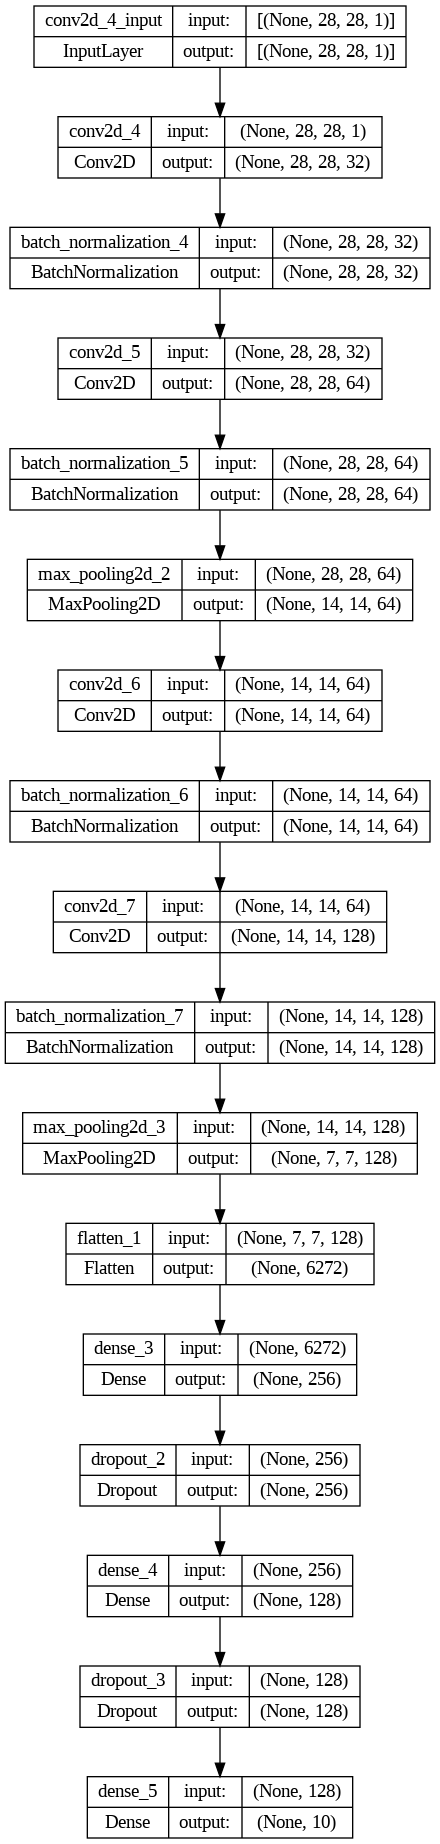

In [12]:
keras.utils.plot_model(model_6_with_batch_norm, to_file='model_6_with_batch_norm.png', show_shapes=True, show_layer_names=True)

In [13]:
model_6_with_batch_norm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                      

In [15]:
model_6_with_batch_norm.compile(optimizer=keras.optimizers.Adam(lr=0.01) , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
# As the model complexity increases I will increase the number of epochs to 40
history_6_with_batch_norm = model_6_with_batch_norm.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,
                                                                  epochs=50,
                                                                  validation_data=val_iterator, 
                                                                  validation_steps=X_val.shape[0]//64,
                                                                  use_multiprocessing=True)


Epoch 1/50


<ipython-input-16-90b979cb5d28>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_6_with_batch_norm = model_6_with_batch_norm.fit_generator(train_iterator, steps_per_epoch=X_train.shape[0]//64,


750/750 [==============================] - 27s 25ms/step - loss: 1.5014 - accuracy: 0.5006 - val_loss: 0.7207 - val_accuracy: 0.7334
Epoch 2/50
750/750 [==============================] - 19s 25ms/step - loss: 0.8583 - accuracy: 0.6829 - val_loss: 0.6613 - val_accuracy: 0.7494
Epoch 3/50
750/750 [==============================] - 22s 29ms/step - loss: 0.7550 - accuracy: 0.7199 - val_loss: 0.6452 - val_accuracy: 0.7560
Epoch 4/50
750/750 [==============================] - 22s 29ms/step - loss: 0.7286 - accuracy: 0.7334 - val_loss: 0.6038 - val_accuracy: 0.7990
Epoch 5/50
750/750 [==============================] - 19s 26ms/step - loss: 0.7137 - accuracy: 0.7413 - val_loss: 0.7267 - val_accuracy: 0.7609
Epoch 6/50
750/750 [==============================] - 18s 24ms/step - loss: 0.7011 - accuracy: 0.7527 - val_loss: 0.5449 - val_accuracy: 0.8070
Epoch 7/50
750/750 [==============================] - 20s 26ms/step - loss: 0.7095 - accuracy: 0.7523 - val_loss: 0.5522 - val_accuracy: 0.7991
Epo

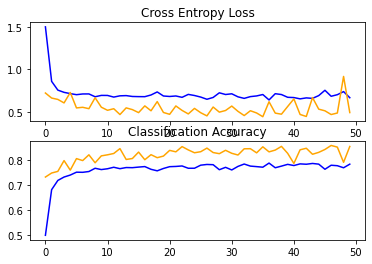

In [17]:
plot_performance(history_6_with_batch_norm)

## Model Evaluation

In [ ]:
# evaluate model
_, acc = model_6_with_batch_norm.evaluate(X_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.4999 - accuracy: 0.8255
> 82.550


# The 2nd approach : TRANSFER LEARNING

I will go through 3 experiments : 

1.   Fine-tuning starts from the classification head only
2.   Fine-tuning starts from the the first convolution block from the top
3.   Fine-tuning starts from the the third convolution block from the top



## Fine-tune classification head only

### Define image generator suitable for Vgg-16

In [ ]:
train_generator = ImageDataGenerator(rotation_range=10, 
                                     width_shift_range=0.5, 
                                     height_shift_range=0.5,
                                     horizontal_flip=True, 
                                     preprocessing_function=preprocess_input) # VGG16 preprocessing

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing


In [ ]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(500, activation='relu')(top_model)
    top_model = Dense(100, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


### Change the image size in order to make it compitable with VGG-16

In [ ]:
def change_shape(x):
  # Change the shape to (48, 48, 3)
  x = np.reshape(x, (len(x), 28, 28, 1))
  # Current shape (len, 28, 28, 1)
  x = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x))
  # Current shape (len, 28, 28, 3)
  x = np.array(tf.image.resize(x, [48, 48]))
  # Current shape (48, 48, 3)
  # Normalise the data and change data type
  #x = x / 255.
  #x = x.astype('float32')
  # Preprocess input
  return x



In [ ]:
X_train = change_shape(X_train)
X_test = change_shape(X_test)
X_val = change_shape(X_val)

In [ ]:
traingen  = train_generator.flow(X_train, y_train, batch_size=64)
validgen = test_generator.flow(X_val, y_val, batch_size=64)

In [ ]:
input_shape = (48, 48, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=10
BATCH_SIZE = 64
#n_steps = traingen.samples // BATCH_SIZE
#n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 10

# First we'll train the model without Fine-tuning
vgg_model_1 = create_model(input_shape, n_classes, optim_1, fine_tune=0)


In [ ]:
from livelossplot.inputs.keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')


In [ ]:
vgg_history = vgg_model_1.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=X_train.shape[0]//64,
                            validation_steps=X_val.shape[0]//64,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)


Epoch 1/10
241/750 [========>.....................] - ETA: 13:18 - loss: 2.3635 - accuracy: 0.1178

KeyboardInterrupt: ignored